In [92]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [93]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, Normalizer, QuantileTransformer, RobustScaler,\
PowerTransformer, KBinsDiscretizer, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.feature_extraction import DictVectorizer

# DATA

In [94]:
train_df = pd.read_csv("../data/travel_insurance_prediction_train.csv")
test_df = pd.read_csv("../data/travel_insurance_prediction_test.csv")

In [95]:
X_cat = train_df.drop(["Customer","TravelInsurance"],axis=1).select_dtypes(include='object').columns
X_num = train_df.drop(["Customer","TravelInsurance"],axis=1).select_dtypes(include='int64').columns
X_cat.tolist(), X_num.tolist()

(['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad'],
 ['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases'])

In [100]:
encoder = OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore")
transformer = make_column_transformer((encoder, X_cat),remainder="passthrough")
train, validation = train_test_split(train_df)
X_train = transformer.fit_transform(train.drop(columns=["Customer", "TravelInsurance"]))
y_train = train["TravelInsurance"].values
X_val = transformer.transform(validation.drop(columns=["Customer", "TravelInsurance"]))
y_val = validation["TravelInsurance"].values
X_test = transformer.transform(test_df.drop(columns=["Customer"]))

In [101]:
dtc = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [103]:
y_train_pred = dtc.predict(X_train)
y_val_pred = dtc.predict(X_val)

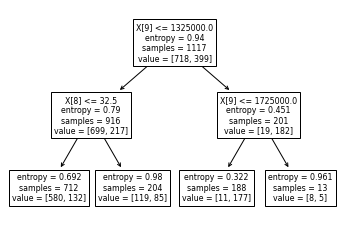

In [104]:
from sklearn.tree import plot_tree
plot_tree(dtc);

In [106]:
model = DecisionTreeClassifier(random_state=0)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2],
}
cv = GridSearchCV(model, param_grid, scoring='f1', cv=3)
cv.fit(X_train, y_train);

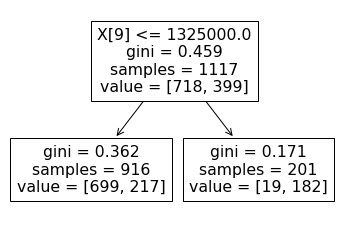

In [108]:
best_model = cv.best_estimator_
cv.best_params_
plot_tree(best_model);

In [109]:
best_model.classes_

array([0, 1])

In [115]:
best_model.predict(X_train)

array([0, 0, 0, ..., 1, 0, 0])

In [114]:
print(classification_report(y_train, best_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.76      0.97      0.86       718
           1       0.91      0.46      0.61       399

    accuracy                           0.79      1117
   macro avg       0.83      0.71      0.73      1117
weighted avg       0.81      0.79      0.77      1117



In [116]:
print(classification_report(y_val, best_model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       240
           1       0.88      0.44      0.58       133

    accuracy                           0.78       373
   macro avg       0.82      0.70      0.72       373
weighted avg       0.80      0.78      0.75       373



# OUTPUT

In [ ]:
test_id = test_df["Customer"]
test_pred = best_tree_clf.predict(X_test)

In [ ]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["Customer", "TravelInsurance"])

In [ ]:
submission.head()

In [ ]:
submission.to_csv("../data/travel_insurance_submission-try-2.csv", header=True, index=False)